Inainte sa trimiti notebook-ul:

* asigura-te ca totul se executa cum trebuie. Prima oara, **restarteaza kernel-ul** (in meniu, selecteaza Kernel$\rightarrow$Restart & Run all);

* nu lasa niciun mesaj la output (`disp`, `printf`, linii care nu sunt incheiate cu `;`) in functiile pe care le scrii decat daca ti se specifica explicit sa faci acest lucru! Orice abatere va fi **depunctata automat** de grader;

* citeste instructiunile de [aici](https://github.com/radusqrt/numerical-methods/blob/master/lab_instructions.md) cu atentie;

* asigura-te ca rezolvi toate celulele in care scrie `YOUR CODE HERE` sau `YOUR ANSWER HERE` si ca iti treci numele mai jos:

In [1]:
STUDENT_NAME = "PETRUC_RARES";

---

# Laborator 9: Interpolari
### Autor: Radu Stochitoiu

## Problema 1

Implementati funcția ```vandermonde(x, y)``` ce primește doi vectori linie, $x, y$, reprezentând coordonatele pe axele OX și OY ale unor puncte ce definesc suportul interpolării și returnează un vector coloană, $P$, ce reprezintă polinomul care trece prin toate punctele.

Primul element al lui $P$ reprezintă coeficientul celei mai mari puteri.

Ultimul element al lui $P$ reprezintă coeficientul celei mai mici puteri ($x^0$).

In [2]:
function [P] = vandermonde(x, y)
    n = length(x);
    P = zeros(n:1);
    A = zeros(n);
    A(:, 1) = 1;
    for i = 1:n
        A(i, [2:n]) = x(i).^(1:n-1);
    endfor
    P = flip((inv(A))*y');
endfunction

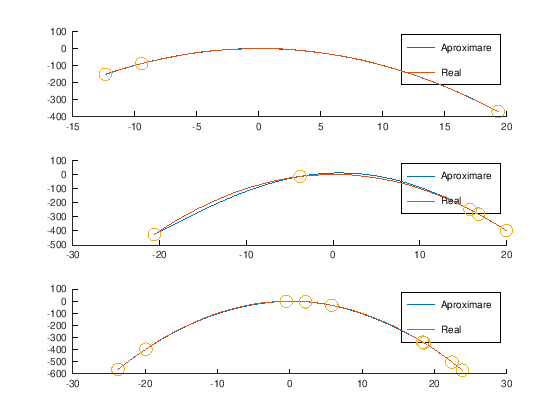

In [3]:
function [y] = f(x)
    y = sin(x) - x.^2;
endfunction

% Test 1
x = sort((rand(1, 3) - 0.5) * 50);
y = f(x);
P = vandermonde(x, y);

subplot(3, 1, 1);
hold
xx = linspace(min(x), max(x));
yy = polyval(P, xx);
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(polyval(P, x(i)) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 2
x = sort((rand(1, 5) - 0.5) * 50);
y = f(x);
P = vandermonde(x, y);

subplot(3, 1, 2);
hold
xx = linspace(min(x), max(x));
yy = polyval(P, xx);
plot(xx, yy)
plot(xx, f(xx))
hold on
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(polyval(P, x(i)) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 3
x = sort((rand(1, 10) - 0.5) * 50);
y = f(x);
P = vandermonde(x, y);

subplot(3, 1, 3);
hold
xx = linspace(min(x), max(x));
yy = polyval(P, xx);
plot(xx, yy)
plot(xx, f(xx))
hold on
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(polyval(P, x(i)) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

## Problema 2

Implementati funcția ```lagrange(x, y, xx)``` ce primește doi vectori linie, $x, y$, reprezentând coordonatele pe axele OX și OY ale unor puncte ce definesc suportul interpolării și un vector linie $xx$ pentru care vrem să găsim valorile aproximate și returnează un vector linie, $yy$, ce reprezintă valorile interpolării Lagrange cu suportul $x, y$ prin toate punctele $xx$.

In [4]:
function [yy] = lagrange(x, y, xx)

    n = length(x);
    yy = zeros(1, length(xx));
    for i = 1:n
        L = 1;
        for j = 1:n 
            if (j ~= i)
                L = L .* (xx - x(j))/(x(i)-x(j));
            endif
        endfor
        yy = yy + L*y(i);
    endfor
endfunction

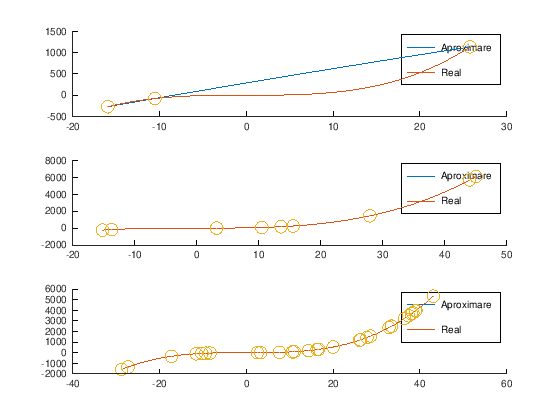

In [5]:
function [y] = f(x)
    y = x.^3 / 15 - 3;
endfunction

% Test 1
x = sort((rand(1, 3) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
yy = lagrange(x, y, xx);
yy_test = lagrange(x, y, x);

subplot(3, 1, 1);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 2
x = sort((rand(1, 10) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
yy = lagrange(x, y, xx);
yy_test = lagrange(x, y, x);

subplot(3, 1, 2);
hold
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 3
x = sort((rand(1, 30) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
yy = lagrange(x, y, xx);
yy_test = lagrange(x, y, x);

subplot(3, 1, 3);
hold
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

## Problema 3

Implementati funcția ```newton(x, y)``` ce primește doi vectori linie, $x, y$, reprezentând coordonatele pe axele OX și OY ale unor puncte ce definesc suportul interpolării și returnează un vector linie, $P$, ce reprezintă coeficienții interpolării prin diferențe divizate ($b_0, b_1, ...$).

Primul element al lui $P$ reprezintă coeficientul celei mai mari puteri.

Ultimul element al lui $P$ reprezintă coeficientul celei mai mici puteri.

In [6]:
% Functie care calculeaza recursiv coeficientul f[x_start, ..., x_stop]
% Nu e obligatoriu sa o implementati
function [b] = newton_helper(x, y, start, stop)
    % YOUR CODE HERE
    error('No Answer Given!')
endfunction

function [P] = newton(x, y)
    n = length(x);
    P = zeros(1, n);
    P(1) = y(1);
    P(2) = (y(2)-y(1))/(x(2)-x(1));
    P(3) = ((y(3)-y(2))/(x(3)-x(2))-(y(2)-y(1))/(x(2)-x(1)))/(x(3)-x(1));
    
    %P1 = produs1
    %P2 = produs2
    
    P1 = 1;
    P2 = 1;
    
    for i = 4:n
    
        s = 0;
        P1 = 1;
        P2 = 1;
        
        for j = 2:i-1
        
            P1 = P1 * (x(i)-x(j-1));
            s = s + P(j)*P1;
        
        endfor
        
        s = s+P(1);
        s = -s;
        
        P2 = P1*(x(i)-x(i-1));
        
        P(i) = (y(i) + s)/P2;
    
    endfor
    
    P = flip(P);
    
endfunction

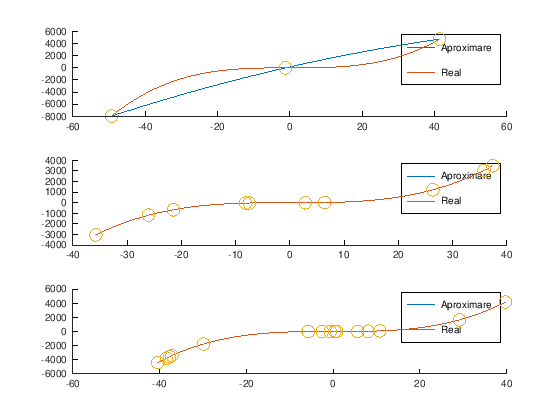

In [7]:
function [y] = newton_eval(P, xx, x)
    y = 0;
    p = 1;
    for i = 1:length(P)
        y += p .* P(length(P) - i + 1);
        p = p .* (x - xx(i));
    endfor
endfunction

function [y] = f(x)
    y = x.^3 / 15 - 3;
endfunction

% Test 1
x = sort((rand(1, 3) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
P = newton(x, y);
yy = newton_eval(P, x, xx);
yy_test = newton_eval(P, x, x);

subplot(3, 1, 1);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 2
x = sort((rand(1, 10) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
P = newton(x, y);
yy = newton_eval(P, x, xx);
yy_test = newton_eval(P, x, x);

subplot(3, 1, 2);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 3
x = sort((rand(1, 15) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
P = newton(x, y);
yy = newton_eval(P, x, xx);
yy_test = newton_eval(P, x, x);

subplot(3, 1, 3);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

## Problema 4

Implementati funcția ```neville(x, y, xx)``` ce primește doi vectori linie, $x, y$, reprezentând coordonatele pe axele OX și OY ale unor puncte ce definesc suportul interpolării și un vector linie $xx$ pentru care vrem să găsim valorile aproximate și returnează un vector linie, $yy$, ce reprezintă valorile interpolării Neville cu suportul $x, y$ prin toate punctele $xx$.

In [8]:
% Functie care calculeaza recursiv P_ij(to_eval) pentru suportul [x, y]
% Nu e obligatoriu sa o implementati
function [res] = P(to_eval, x, y, i, j)
    % YOUR CODE HERE
    error('No Answer Given!')
endfunction

function [yy] = neville(x, y, xx)
    n = length(x);
    yy = zeros(1, length(xx));
    P = cell(n);
    for i = 1:n
        P(i, i) = y(i);
    endfor
    for k= 2:n
    
        i = 1;
    
            for j = k:n
            
              P(i, j) = (conv([1, -x(j)], cell2mat(P(i, j-1))) + conv([-1, x(i)], cell2mat(P(i+1, j))))/(x(i)-x(j));
              i++;
            
            endfor
            
    endfor
    
    poli = cell2mat(P(1, n));
    yy = polyval(poli, xx);
    
endfunction

In [9]:
x = [-2 2 3 5]; 
y = [-3 1 3 7];
xx = 1;

yy = neville(x, y, xx)

yy = -0.77143


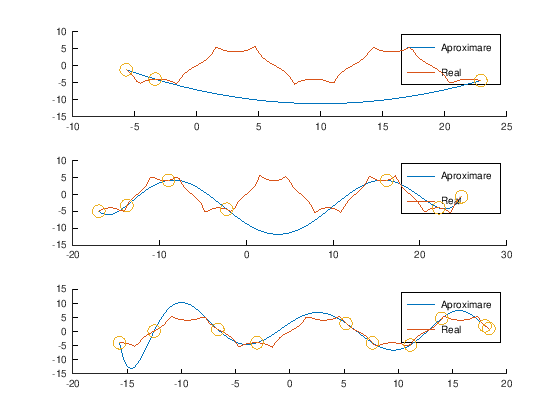

In [10]:
function [y] = f(x)
    y = 8 * sin(x / 2) ./ (abs(cos(x)) + 1);
endfunction

% Test 1
x = sort((rand(1, 3) - 0.5) * 50);
y = f(x);
xx = linspace(min(x), max(x));
yy = neville(x, y, xx);
yy_test = neville(x, y, x);

subplot(3, 1, 1);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 2
x = sort((rand(1, 7) - 0.5) * 50);
y = f(x);
xx = linspace(min(x), max(x));
yy = neville(x, y, xx);
yy_test = neville(x, y, x);

subplot(3, 1, 2);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 3
x = sort((rand(1, 10) - 0.5) * 50);
y = f(x);
xx = linspace(min(x), max(x));
yy = neville(x, y, xx);
yy_test = neville(x, y, x);

subplot(3, 1, 3);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

In [11]:
function yi = Neville(x, y, xi)
n = length(x);
for k = 1 : n-1
    for i = 1 : n-k
        raport = (xi-x(k+i))/(x(i)-x(k+i));
        y(i) = raport*y(i)+(1-raport)*y(i+1);
    endfor
endfor
yi = y(1);
endfunction

In [12]:
x = [-2 2 3 5]; 
y = [-3 1 3 7];
xx = 1;

yy = Neville(x, y, xx)

yy = -0.77143


## Problema 5

Implementati funcția ```spline_c2_natural(x, y)``` ce primește doi vectori linie, $x, y$, reprezentând coordonatele pe axele OX și OY ale unor puncte ce definesc suportul interpolării și returnează o matrice $S$ ce are pe linia i coeficienții $a_{i-1}, b_{i-1}, c_{i-1}, d_{i-1}$.

In [13]:
function [S] = spline_c2_natural(x, y)
    n = length(x)-1;
    A = zeros(4*n);
    b = zeros(4*n, 1);
    j=1;
    % primele n+1 ecuatii
    for i = 1:4:4*n
        A(j, i) = 1;
        b(j) = y(j);
        j++;
    endfor
    
    A(j, [4*n-3:4*n]) = [(x(n+1)-x(n)).^([0:2+1])];
    b(j) = y(j);
    j++;
    
    % pana aici
    
    % urmatoarele n-1 ecuatii
    
    for i = 0:n-2
    
        A(j, [4*i+1:4*(i+1)]) = (x(i+2)-x(i+1)).^([0:3]);
        A(j, 4*(i+1)+1) = -1;
    
        j++;
    endfor   
    % pana aici
    
    % urmatoarele n-1 ecuatii
    
    for i = 0:n-2
    
        A(j, [4*i+2:4*(i+1)]) = (x(i+2)-x(i+1)).^[0:2].*[1:3];
        A(j, 4*(i+1)+2) = -1;
        
        j++;
    
    endfor
    
    % pana aici

    % urmatoarele n-1 ecuatii
    
    for i = 0:n-2
    
        A(j, [4*i+3:4*(i+1)]) = (x(i+2)-x(i+1)).^[0:1].*[2, 6];
        A(j, 4*(i+1)+3) = -2;
        
        j++;
    
    endfor    
    
    % pana aici

    % ultimele 2 ecuatii pentru spline natural

        A(j, 3) = 1;
        
        j++;
        
        A(j, [4*(n-1)+3, 4*(n-1)+4]) = [2, 6*(x(n+1)- x(n))];

    x = inv(A)*b;
    S = reshape(x, 4, n)';
endfunction

In [14]:
%x = [0 1 2];
%y = [6 4 3];
x = [0 1 2];
y = [-2 0 2];
[S] = spline_c2_natural(x, y);
S

n = length(x);
for i = 1:n-1

    pola = [0, 0, 0, 1];
    polb = [0, 0, 1, -x(i)];
    polc = [0, conv([1, -x(i)], [1, -x(i)])];
    pold = conv(conv([1, -x(i)], [1, -x(i)]), [1, -x(i)]);

    polinom = S(i, 1)*pola + S(i, 2)*polb + S(i, 3)*polc + S(i, 4)*pold;

    polyval(polinom, x(i))
    polyval(polinom, x(i+1))

endfor

S =

  -2.00000   2.00000   0.00000   0.00000
   0.00000   2.00000   0.00000   0.00000

ans = -2
ans =   -2.2204e-16
ans = 0
ans =  2


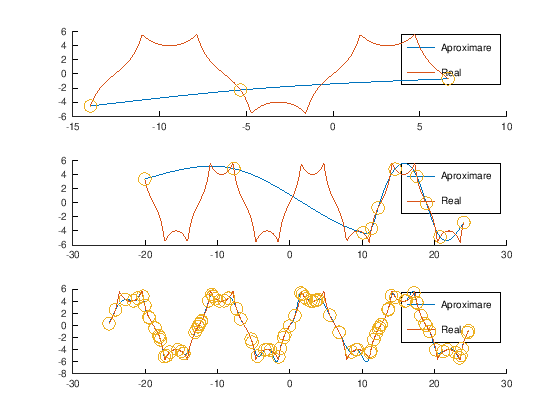

In [15]:
function [XX, YY] = spline_eval(S, x, y)
    XX = [];
    YY = [];
    n = length(x) - 1;
    for i = 1:n
        s = S(i, :);
        xx = linspace(x(i), x(i + 1));
        yy = s(1);
        yy += s(2) * (xx - repmat(x(i), 1, 100));
        yy += s(3) * (xx - repmat(x(i), 1, 100)) .^ 2;
        yy += s(4) * (xx - repmat(x(i), 1, 100)) .^ 3;
        XX = [XX, xx];
        YY = [YY, yy];
    endfor
endfunction

function [y] = f(x)
    y = 8 * sin(x / 2) ./ (abs(cos(x)) + 1);
endfunction

% Test 1
x = sort((rand(1, 3) - 0.5) * 50);
y = f(x);

xx = linspace(min(x), max(x));
S = spline_c2_natural(x, y);
[XX, YY] = spline_eval(S, x, y);

subplot(3, 1, 1);
hold;
plot(XX, YY)
plot(XX, f(XX))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x) - 1
    assert(norm(YY(100 * (i - 1) + 1) - y(i)) < 1e-4);
endfor
assert(norm(YY(end) - y(end)) < 1e-4);
legend("Aproximare", "Real")

% Test 2
x = sort((rand(1, 10) - 0.5) * 50);
y = f(x);

xx = linspace(min(x), max(x));
S = spline_c2_natural(x, y);
[XX, YY] = spline_eval(S, x, y);

subplot(3, 1, 2);
hold;
plot(XX, YY)
plot(XX, f(XX))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x) - 1
    assert(norm(YY(100 * (i - 1) + 1) - y(i)) < 1e-4);
endfor
assert(norm(YY(end) - y(end)) < 1e-4);
legend("Aproximare", "Real")

% Test 3
x = sort((rand(1, 100) - 0.5) * 50);
y = f(x);

xx = linspace(min(x), max(x));
S = spline_c2_natural(x, y);
[XX, YY] = spline_eval(S, x, y);

subplot(3, 1, 3);
hold;
plot(XX, YY)
plot(XX, f(XX))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x) - 1
    assert(norm(YY(100 * (i - 1) + 1) - y(i)) < 1e-4);
endfor
assert(norm(YY(end) - y(end)) < 1e-4);
legend("Aproximare", "Real")

In [16]:
% Spline c1 LAB9

In [17]:
function yi = SplineC1(x, y, dy, xi)
    i = find((x <= xi));
    i = max(i);
    
    if i == length(x)
        i = i-1;
    endif
    
    h = (x(i+1)-x(i));
    t = (xi - x(i))/(h);
    
    ai = y(i) * (1-t)^3;
    bi = (y(i) + h/3*dy(i))*3*(1-t)^2*t;
    ci = (y(i+1) - h/3*dy(i+1))*3*t^2*(1-t);
    di = y(i+1)*t^3;
    
    yi = ai+bi+ci+di;
endfunction

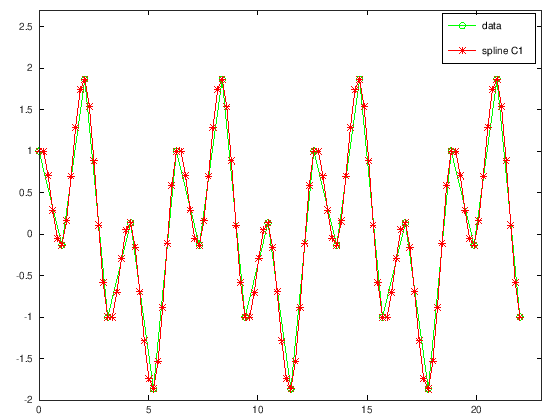

In [18]:
x = 0:pi/3:7*pi;
y = sin(x)+cos(3*x);
dy = cos(x)-3*sin(3*x);
xi = 0:pi/15:7*pi;
yi = zeros(1, length(xi));

%yi(1) = feval('SplineC1', x, f, df, xi(1))

for i = 1 : length(xi)
    yi(i) = feval('SplineC1', x, y, dy, xi(i));
endfor

plot(x, y, 'g-o', xi, yi, 'r-*');
legend ('data', 'spline C1');

axis([0 23 -2 2.7]);

In [19]:
% Spline c1 LAB9

In [20]:
function x = Thomas(a, b, c, d)
n = length(d);
%transform a astfel incat sa aiba n elemente, cu primulelement 0
a = [0; a];
% Operatiile la limita;
c(1) = c(1)/b(1);
d(1) = d(1)/b(1);
% calculul coeficientilor pe caz general.
for i = 2 : n-1
    temp = b(i)-a(i)*c(i-1);
    c(i) = c(i)/temp;
    d(i) = (d(i)-a(i)*d(i-1))/temp;
endfor
d(n) = (d(n)-a(n)*d(n-1))/(b(n)-a(n)*c(n-1));
% Substitutia inapoi pentru rezolvarea sistemului de ecuatii
x(n) = d(n);
for i = n-1 : -1 : 1
    x(i) = d(i)-c(i)*x(i+1);
endfor
x=x';
endfunction

In [21]:
function yi = SplineC2natural(x, y, xi)

    n = length(x);

    index = find((x <= xi));
    index = max(index);
    
    if index == n
        index = index -1;
    endif

    A = eye(n);

    h = x(2)-x(1);

    for i = 2:n-1
        j = i-1;

        A(i, j) = h;
        j++;
        A(i, j) = 4*h;
        j++;
        A(i, j) = h;

    endfor

    auri = y;

    d = 0;

    for i = 2:n-1

        d = [d, 3/h*(auri(i+1)-auri(i))-3/h*(auri(i)-auri(i-1))];

    endfor

    d = [d, 0];

    a = diag(A, -1);
    b = diag(A, 0);
    c = diag(A, 1);

    curi = Thomas(a, b, c, d');

    buri = zeros(1, n);
    duri = zeros(1, n);

    for i = 1:n-1

        buri(i) = (auri(i+1)- auri(i))/h - h/3*(2*curi(i) + curi(i+1));
        duri(i) = (curi(i+1)- curi(i))/(3*h);

    endfor

    p = [auri(index), buri(index), curi(index), duri(index)];
    yi = polyval(p, x(index));
endfunction

ans =  1.1241


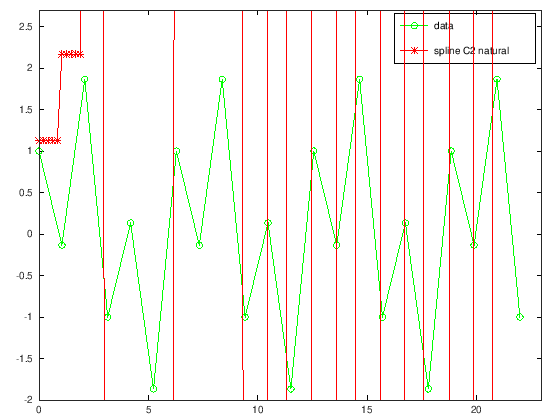

In [22]:
x = 0:pi/3:7*pi;
y = sin(x)+cos(3*x);
xi = 0:pi/15:7*pi;

for i = 1 : length(xi)
    yi(i) = feval('SplineC2natural', x, y, xi(i));
endfor
yi(1)
plot(x, y, 'g-o', xi, yi, 'r-*');
legend ('data', 'spline C2 natural');
axis([0 23 -2 2.7]);

# 

In [23]:
A = [1 2 3; 4 5 6; 0 8 9]
a = diag(A, 1)
b = diag(A, 0)
c = diag(A, -1)

A =

   1   2   3
   4   5   6
   0   8   9

a =

   2
   6

b =

   1
   5
   9

c =

   4
   8



In [24]:
function x = Thomas(a, b, c, d)

    n = length(d);
    
    a = [0; a];
    
    c(1) = c(1)/b(1);
    d(1) = d(1)/b(1);

    for i = 2:n-1
    
        temp = b(i) - a(i)*c(i-1);
        c(i) = c(i)/temp;
        d(i) = (d(i) - a(i)*d(i-1))/temp;
    
    endfor
    d(n) = (d(n)-a(n)*d(n-1))/(b(n)-a(n)*c(n-1));
    
    x(n) = d(n);
    for i = n-1:-1:1
        x(i) = d(i) - c(i)*x(i+1);
    endfor

    x=x';

endfunction

In [25]:
x = [0 1 2];
f = [0 1 2];
n = length(x);
Splineuri = zeros(n-1, 4);
h = zeros(n-1, 1);
for i = 1:n-1
    h(i) = x(i+1)-x(i);
endfor

A = eye(n);

a = zeros(n, 1);
a = f;
for i = 2:n-1

    j = i-1;

    A(i, j) = h(i-1);
    j++;
    A(i, j) = 2*(h(i-1) + h(i));
    j++;    
    A(i, j) = h(i);

endfor

b = zeros(n, 1);
%Spline natural
for i = 2:n-1

    b(i) = 3/h(i)*(a(i+1)-a(i))-3/h(i-1)*(a(i)-a(i-1));

endfor
% Spline tensionat

%{
fderiv = [1 -1];
b(1) =  3/h(1)*(a(2)-a(1))-3*fderiv(1);
b(n) = 3*fderiv(2)-3*(a(n)-a(n-1))/h(n-1);
A(1, 1) = 2*h(1);
A(1, 2) = h(1);
A(n, n-1) = h(n-1);
A(n, n) = 2*h(n-1);
%}

c = Thomas(diag(A, -1), diag(A), diag(A, 1), b);

b = zeros(n-1, 1);
for i = 1:n-1

    b(i) = (a(i+1)-a(i))/h(i) -  h(i)/3*(2*c(i) + c(i+1));
    d(i) =  (c(i+1)-c(i))/(3*h(i));

endfor

b = 3*b;
c = 3*c;
for i = 1:n-1
    Splineuri(i, :) = [a(i), b(i), c(i), d(i)];
endfor


a
b
c
d
printf("\n");
polinoma = conv(conv([-1, 1], [-1, 1]), [-1, 1]);
polinomb = conv(conv([1, 0], [-1, 1]), [-1, 1]);
polinomc = conv([1, 0, 0], [-1, 1]);
polinomd = [1, 0, 0, 0];

polinom = cell(n-1, 4);
for i = 1:n-1
    polinom(i) = a(i)*polinoma+b(i)*polinomb+c(i)*polinomc+d(i)*polinomd;
endfor


% verificare
for i = 1:n-1
    yi = polyval(cell2mat(polinom(i)), 0);
    printf("polinom(x(%d)) = %d\n", i, yi);
endfor

a =

   0   1   2

b =

   3
   3

c =

   0
   0
   0

d =

   0   0


polinom(x(1)) = 0
polinom(x(2)) = 1
